In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
%cd /content/drive/My Drive/IDD

/content/drive/My Drive/IDD


In [0]:
from imutils import paths
from tqdm import tqdm
labels_path = paths.list_images("/content/drive/My Drive/IDD/JSON_IMG/Val_Label")
labels_path = sorted(labels_path)


import cv2
from keras.utils.np_utils import to_categorical
import numpy as np
colors = np.array([
    [0,1,0,0,0,0,0,0],      
    [0,0,1,0,0,0,0,0],     
    [0,0,0,1,0,0,0,0],      
    [0,0,0,0,1,0,0,0],        
    [0,0,0,0,0,1,0,0],     
    [0,0,0,0,0,0,1,0],       
    [0,0,0,0,0,0,0,1],    
    [1,0,0,0,0,0,0,0]           
], dtype=np.int)

image_y_cv = []
for name in tqdm(labels_path):
  image = cv2.imread(name)
  image = cv2.resize(image, (256, 256))
  r,g,b =cv2.split(image)
  color_image = np.zeros(
        (r.shape[0], r.shape[1], 8), dtype=np.int)
  for i in range(8):
    color_image[r == i] = colors[i]
  image_y_cv.append(color_image)

from imutils import paths
x_path = paths.list_images("/content/drive/My Drive/IDD/leftImg8bit/val")
x_path = sorted(x_path)

import cv2
image_cv = []
for name in tqdm(x_path):
  image = cv2.imread(name)
  image_cv.append(cv2.resize(image, (256, 256))/255)

import numpy as np
image_cv = np.array(image_cv)
image_y_cv = np.array(image_y_cv)
image_y_cv.shape,image_cv.shape

  



100%|██████████| 1055/1055 [18:45<00:00,  1.07s/it]


((1055, 256, 256, 8), (1055, 256, 256, 3))

In [0]:
from imutils import paths
x_path = paths.list_images("/content/drive/My Drive/IDD/leftImg8bit/train")
x_path = sorted(x_path)
x_path[:5]
from imutils import paths
labels_path = paths.list_images("/content/drive/My Drive/IDD/JSON_IMG/Train_Label")
labels_path = sorted(labels_path)
#labels_path = labels_path[:2001]
labels_path[:5],x_path[:5]

(['/content/drive/My Drive/IDD/JSON_IMG/Train_Label/201_frame0029_gtFine_polygons.png',
  '/content/drive/My Drive/IDD/JSON_IMG/Train_Label/201_frame0299_gtFine_polygons.png',
  '/content/drive/My Drive/IDD/JSON_IMG/Train_Label/201_frame0779_gtFine_polygons.png',
  '/content/drive/My Drive/IDD/JSON_IMG/Train_Label/201_frame1019_gtFine_polygons.png',
  '/content/drive/My Drive/IDD/JSON_IMG/Train_Label/201_frame1469_gtFine_polygons.png'],
 ['/content/drive/My Drive/IDD/leftImg8bit/train/201/frame0029_leftImg8bit.jpg',
  '/content/drive/My Drive/IDD/leftImg8bit/train/201/frame0299_leftImg8bit.jpg',
  '/content/drive/My Drive/IDD/leftImg8bit/train/201/frame0779_leftImg8bit.jpg',
  '/content/drive/My Drive/IDD/leftImg8bit/train/201/frame1019_leftImg8bit.jpg',
  '/content/drive/My Drive/IDD/leftImg8bit/train/201/frame1469_leftImg8bit.jpg'])

In [0]:
import cv2
import gc
import numpy as np
from tqdm import tqdm
colors = np.array([
    [0,1,0,0,0,0,0,0],      
    [0,0,1,0,0,0,0,0],     
    [0,0,0,1,0,0,0,0],      
    [0,0,0,0,1,0,0,0],        
    [0,0,0,0,0,1,0,0],    
    [0,0,0,0,0,0,1,0],      
    [0,0,0,0,0,0,0,1],     
    [1,0,0,0,0,0,0,0]           
], dtype=np.int)
#global block
block = 0
def train_label():
  global block
  image_y = []
  if block + 200 <= 7034:
    for name in tqdm(labels_path[block:block + 200]):
      image = cv2.imread(name)
      image = cv2.resize(image, (256, 256))
      r,g,b =cv2.split(image)
      color_image = np.zeros(
        (r.shape[0], r.shape[1], 8), dtype=np.int)
      for i in range(8):
        color_image[r == i] = colors[i]

      image_y.append(color_image)
    block = block + 200
  elif block < 7034:
      for name in labels_path[block:]:
        image = cv2.imread(name)
        image = cv2.resize(image, (256, 256))
        r,g,b =cv2.split(image)
        color_image = np.zeros((r.shape[0], r.shape[1], 8), dtype=np.int)
        for i in range(8):
          color_image[r == i] = colors[i]
        image_y.append(color_image)
      block = 0
  else:
    block = 0
    for name in tqdm(labels_path[block:block + 200]):
      image = cv2.imread(name)
      image = cv2.resize(image, (256, 256))
      r,g,b =cv2.split(image)
      color_image = np.zeros((r.shape[0], r.shape[1], 8), dtype=np.int)
      for i in range(8):
        color_image[r == i] = colors[i]
      image_y.append(color_image)
    block = block + 200
  image_y = np.array(image_y)
  collected = gc.collect()  
  print("Garbage collector: collected", 
          "%d objects." % collected)
  return image_y


  


In [0]:
import cv2
block_1 = 0
def train():
  collected = gc.collect()
  print("Garbage collector: collected","%d objects." % collected) 
  global block_1
  image_tr = []
  if block_1 + 200 <= 7034:
    for name in tqdm(x_path[block_1:block_1 + 200]):
      image = cv2.imread(name)
      img = cv2.resize(image, (256, 256))
      img = np.float32(img)  / 255 
      image_tr.append(img)
    block_1 = block_1 + 200
  elif block_1 < 7034:
    for name in tqdm(x_path[block_1:]):
      image = cv2.imread(name)
      img = cv2.resize(image, (256, 256))
      img = np.float32(img)  / 255 
      image_tr.append(img)
    block_1 = 0
  else:
    block_1 = 0
    for name in tqdm(x_path[block_1:block_1 + 200]):
      image = cv2.imread(name)
      img = cv2.resize(image, (256, 256))
      img = np.float32(img)  / 255
      image_tr.append(img)
    block_1 = block_1 + 200
  image_tr = np.array(image_tr)
  return image_tr 





In [0]:
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras
def SegNet(input_shape=(256, 256, 3), classes=8):
    # https://github.com/namakemono/keras-segnet/blob/master/segnet.py
    img_input = Input(shape=input_shape)
    x = img_input
    # Encoder
    x = Convolution2D(64, 3, 3, border_mode="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    
    x = Convolution2D(128, 3, 3, border_mode="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    
    x = Convolution2D(256, 3, 3, border_mode="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    
    x = Convolution2D(512, 3, 3, border_mode="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    
    # Decoder
    x = Convolution2D(512, 3, 3, border_mode="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    
    x = UpSampling2D(size=(2, 2))(x)
    x = Convolution2D(256, 3, 3, border_mode="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    
    x = UpSampling2D(size=(2, 2))(x)
    x = Convolution2D(128, 3, 3, border_mode="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    
    x = UpSampling2D(size=(2, 2))(x)
    x = Convolution2D(64, 3, 3, border_mode="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    
    x = Convolution2D(classes, 1, 1, border_mode="valid")(x)
    #x = Reshape((input_shape[0]*input_shape[1], classes))(x)
    x = Activation('softmax')(x)
    model = Model(img_input, x)
    return model

In [0]:
# Load the TensorBoard notebook extension
from keras.callbacks import TensorBoard
%load_ext tensorboard
import tensorflow as tf
import datetime, os
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = TensorBoard("logs", histogram_freq=1)

In [0]:
from keras.callbacks import EarlyStopping

from keras.callbacks import ReduceLROnPlateau

earlyStopping = EarlyStopping(monitor='val_loss', patience=2, verbose=1, mode='min')
mcp_save = ModelCheckpoint('segnet_no_data_augument.hdf5', save_best_only=True, monitor='val_loss', mode='min')
#reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, epsilon=1e-4, mode='min')


In [0]:
def IoU(y_val, y_pred):
    class_iou = []
    n_classes = 8
    
    y_predi = np.argmax(y_pred, axis=3)
    y_truei = np.argmax(y_val, axis=3)
    
    for c in range(n_classes):
        TP = np.sum((y_truei == c) & (y_predi == c))
        FP = np.sum((y_truei != c) & (y_predi == c))
        FN = np.sum((y_truei == c) & (y_predi != c)) 
        IoU = TP / float(TP + FP + FN)
        if(float(TP + FP + FN) == 0):
          IoU=TP/0.001
        class_iou.append(IoU)
    MIoU=sum(class_iou)/n_classes
    return MIoU
def miou( y_true, y_pred ) :
    score = tf.py_function( lambda y_true, y_pred : IoU( y_true, y_pred).astype('float32'),
                        [y_true, y_pred],
                        'float32')
    return score

In [0]:
model = SegNet()
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy',miou])
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), padding="same")`


Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 256, 256, 64)      1792      
_________________________________________________________________
batch_normalization_17 (Batc (None, 256, 256, 64)      256       
_________________________________________________________________
activation_19 (Activation)   (None, 256, 256, 64)      0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 128, 128, 128)     73856     
_________________________________________________________________
batch_normalization_18 (Batc (None, 128, 128, 128)     512 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (1, 1), padding="valid")`


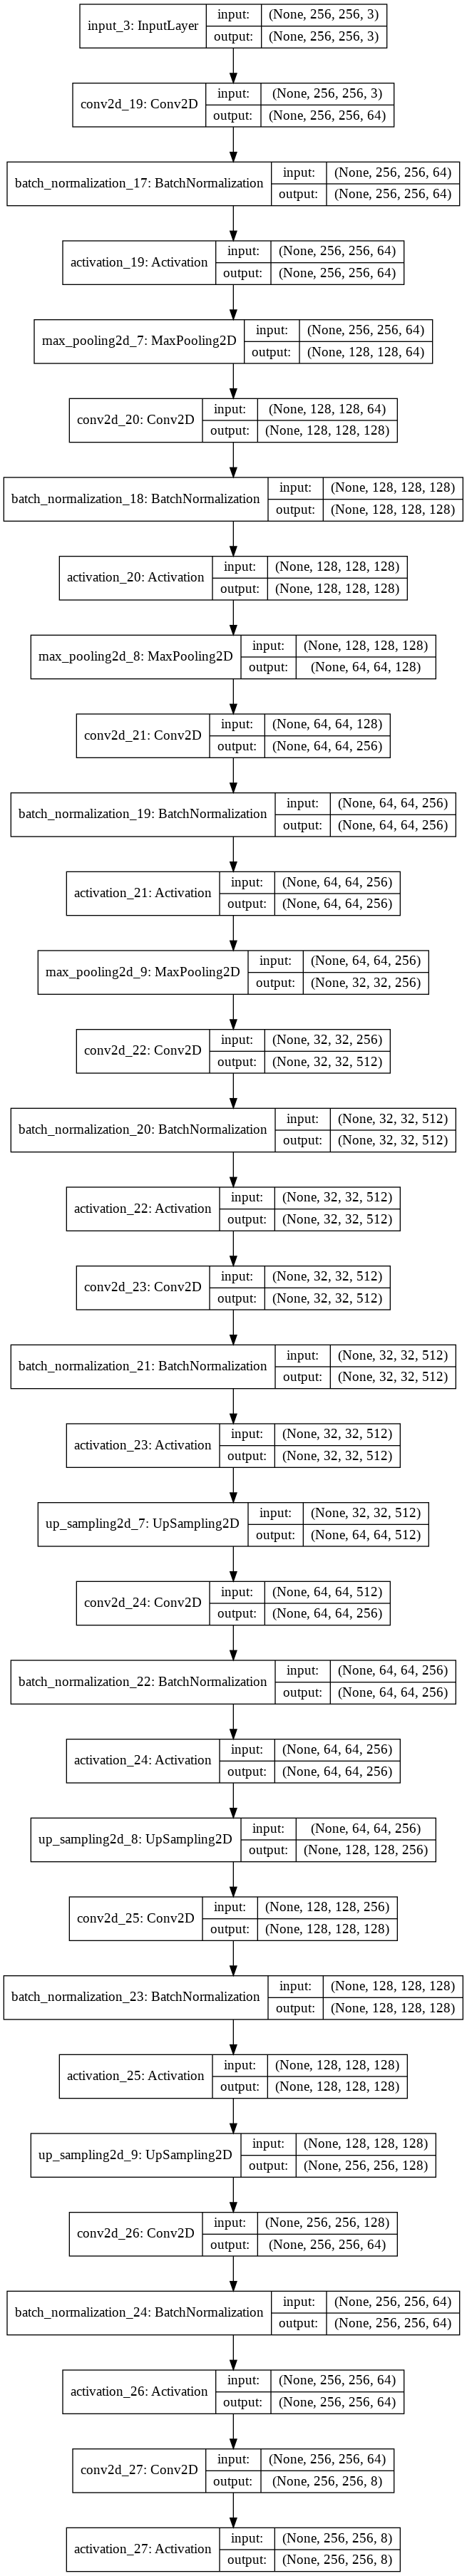

In [0]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='segnet_no_data_augument.png', show_shapes=True, show_layer_names=True)

In [0]:
flag = 1
history_1 = []
while(flag):
  x  = train()  
  y = train_label()
  history = model.fit(x,y,batch_size=5,epochs = 3 ,callbacks=[earlyStopping, mcp_save,tensorboard_callback],validation_data=(image_cv,image_y_cv))
  history_1.append(history)
  flag = int(input ("Enter 0 if you want to stop training" ))
  if flag == 0:
    break


  0%|          | 0/200 [00:00<?, ?it/s]

Garbage collector: collected 9874 objects.


100%|██████████| 200/200 [02:09<00:00,  1.54it/s]


Garbage collector: collected 0 objects.
Train on 200 samples, validate on 1055 samples
Epoch 1/3
 10/200 [>.............................] - ETA: 3:41 - loss: 1.9441 - accuracy: 0.3435 - miou: 0.1348

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.470706). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 25/200 [==>...........................] - ETA: 1:33 - loss: 1.4136 - accuracy: 0.5530 - miou: 0.2090

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


200/200 [==============================] - 46s 231ms/step - loss: 0.7912 - accuracy: 0.7591 - miou: 0.2873 - val_loss: 5.8444 - val_accuracy: 0.5043 - val_miou: 0.1302
Epoch 2/3
200/200 [==============================] - 34s 170ms/step - loss: 0.6159 - accuracy: 0.7963 - miou: 0.3246 - val_loss: 6.4461 - val_accuracy: 0.5056 - val_miou: 0.1413
Epoch 3/3
200/200 [==============================] - 34s 171ms/step - loss: 0.5506 - accuracy: 0.8136 - miou: 0.3594 - val_loss: 4.3926 - val_accuracy: 0.5015 - val_miou: 0.1413
Enter 0 if you want to stop training1


  0%|          | 0/200 [00:00<?, ?it/s]

Garbage collector: collected 37 objects.


100%|██████████| 200/200 [01:57<00:00,  1.70it/s]


Garbage collector: collected 0 objects.
Train on 200 samples, validate on 1055 samples
Epoch 1/3
200/200 [==============================] - 34s 170ms/step - loss: 0.5796 - accuracy: 0.7984 - miou: 0.3363 - val_loss: 5.7737 - val_accuracy: 0.5142 - val_miou: 0.1392
Epoch 2/3
200/200 [==============================] - 34s 171ms/step - loss: 0.4986 - accuracy: 0.8227 - miou: 0.3658 - val_loss: 5.3112 - val_accuracy: 0.5123 - val_miou: 0.1425
Epoch 3/3
200/200 [==============================] - 34s 172ms/step - loss: 0.4861 - accuracy: 0.8279 - miou: 0.3761 - val_loss: 5.0091 - val_accuracy: 0.5040 - val_miou: 0.1424
Enter 0 if you want to stop training1


  0%|          | 0/200 [00:00<?, ?it/s]

Garbage collector: collected 37 objects.


100%|██████████| 200/200 [02:09<00:00,  1.54it/s]


Garbage collector: collected 0 objects.
Train on 200 samples, validate on 1055 samples
Epoch 1/3
200/200 [==============================] - 34s 171ms/step - loss: 0.7870 - accuracy: 0.7125 - miou: 0.3320 - val_loss: 4.7847 - val_accuracy: 0.5075 - val_miou: 0.1427
Epoch 2/3
200/200 [==============================] - 34s 172ms/step - loss: 0.7192 - accuracy: 0.7334 - miou: 0.3460 - val_loss: 3.6475 - val_accuracy: 0.4426 - val_miou: 0.1254
Epoch 3/3
200/200 [==============================] - 35s 173ms/step - loss: 0.7001 - accuracy: 0.7410 - miou: 0.3545 - val_loss: 2.1496 - val_accuracy: 0.5366 - val_miou: 0.1732
Enter 0 if you want to stop training1


  0%|          | 0/200 [00:00<?, ?it/s]

Garbage collector: collected 28 objects.


100%|██████████| 200/200 [02:06<00:00,  1.58it/s]


Garbage collector: collected 0 objects.
Train on 200 samples, validate on 1055 samples
Epoch 1/3
200/200 [==============================] - 35s 175ms/step - loss: 0.6810 - accuracy: 0.7489 - miou: 0.3463 - val_loss: 2.2561 - val_accuracy: 0.5521 - val_miou: 0.1748
Epoch 2/3
200/200 [==============================] - 34s 172ms/step - loss: 0.6239 - accuracy: 0.7685 - miou: 0.3612 - val_loss: 1.2855 - val_accuracy: 0.6616 - val_miou: 0.2316
Epoch 3/3
200/200 [==============================] - 35s 173ms/step - loss: 0.6289 - accuracy: 0.7677 - miou: 0.3597 - val_loss: 1.6305 - val_accuracy: 0.5903 - val_miou: 0.1950
Enter 0 if you want to stop training0


In [0]:
print(block,block_1)

800 800


In [0]:
model.save("segnet_no_data_augument.hdf5")
print("Saved model to disk")#https://machinelearningmastery.com/save-load-keras-deep-learning-models/
#history_1 = model.fit(x  = train(),y = train_label(),batch_size=5,epochs = 100 ,callbacks=[earlyStopping, mcp_save,tensorboard_callback],validation_data=(image_cv,image_y_cv))

Saved model to disk


In [0]:
val_loss = []
for i in range(len(history_1)):
  val_loss.append(history_1[i].history['val_loss'])

flat_val_loss = []
for sublist in val_loss:
    for item in sublist:
        flat_val_loss.append(item)

loss = []
for i in range(len(history_1)):
  loss.append(history_1[i].history['loss'])

flat_loss = []
for sublist in loss:
    for item in sublist:
        flat_loss.append(item)

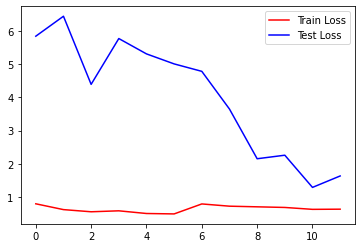

In [0]:
import matplotlib.pyplot as plt


plt.plot(flat_loss, 'r')
plt.plot(flat_val_loss, 'b')
plt.legend({'Train Loss': 'r', 'Test Loss':'b'})
plt.show()

In [0]:
val_loss = []
for i in range(len(history_1)):
  val_loss.append(history_1[i].history['val_miou'])

flat_val_loss = []
for sublist in val_loss:
    for item in sublist:
        flat_val_loss.append(item)

loss = []
for i in range(len(history_1)):
  loss.append(history_1[i].history['miou'])

flat_loss = []
for sublist in loss:
    for item in sublist:
        flat_loss.append(item)

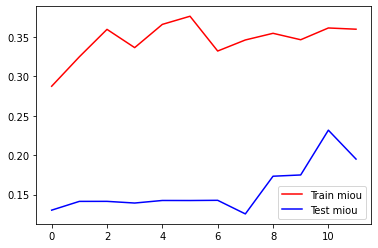

In [0]:
import matplotlib.pyplot as plt


plt.plot(flat_loss, 'r')
plt.plot(flat_val_loss, 'b')
plt.legend({'Train miou': 'r', 'Test miou':'b'})
plt.show()

In [0]:
val_loss = []
for i in range(len(history_1)):
  val_loss.append(history_1[i].history['val_accuracy'])

flat_val_loss = []
for sublist in val_loss:
    for item in sublist:
        flat_val_loss.append(item)

loss = []
for i in range(len(history_1)):
  loss.append(history_1[i].history['accuracy'])

flat_loss = []
for sublist in loss:
    for item in sublist:
        flat_loss.append(item)

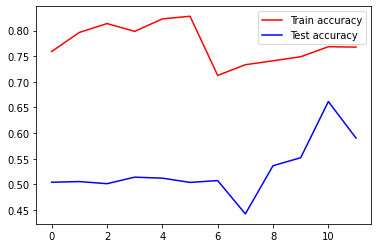

In [0]:
import matplotlib.pyplot as plt


plt.plot(flat_loss, 'r')
plt.plot(flat_val_loss, 'b')
plt.legend({'Train accuracy': 'r', 'Test accuracy':'b'})
plt.show()

In [0]:
x_path = paths.list_images("/content/drive/My Drive/IDD/leftImg8bit/test")
x_path = sorted(x_path)
x_path[:5]

['/content/drive/My Drive/IDD/leftImg8bit/test/200/frame0199_leftImg8bit.jpg',
 '/content/drive/My Drive/IDD/leftImg8bit/test/200/frame0252_leftImg8bit.jpg',
 '/content/drive/My Drive/IDD/leftImg8bit/test/200/frame1090_leftImg8bit.jpg',
 '/content/drive/My Drive/IDD/leftImg8bit/test/200/frame1250_leftImg8bit.jpg',
 '/content/drive/My Drive/IDD/leftImg8bit/test/200/frame1457_leftImg8bit.jpg']

In [0]:
image_te = []
image = cv2.imread(x_path[0])
img = cv2.resize(image, (256, 256))
img = np.float32(img)  / 255 
image_te.append(img)
image_te = np.array(image_te)
result = model.predict(image_te)
result = np.argmax(result, axis=3)

In [0]:
colors = np.array([
    [255, 192 ,203	],      
    [255, 160, 122],     
    [255, 105, 180],      
    [205,  92,  92],        
    [255, 165,   0],    
    [255, 255,   0],      
    [165,  42,  42],     
    [0,   0, 255]           
], dtype=np.int)
image_y_te = []

color_image = np.zeros(
        (result.shape[1], result.shape[2], 3), dtype=np.int)
for i in range(8):
  color_image[result[0] == i] = colors[i]
image_y_te.append(color_image)
image_y_te = np.array(image_y_te)

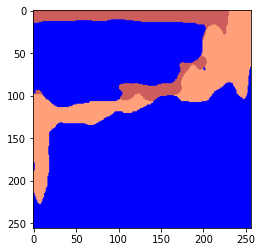

In [0]:

from matplotlib import image
from matplotlib import pyplot

pyplot.imshow(color_image)
pyplot.show()

uint8
(1080, 1920, 3)


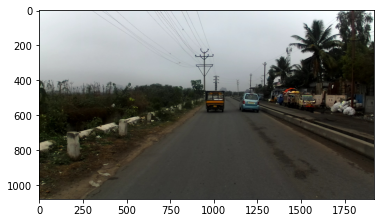

In [0]:
# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot
# load image as pixel array
data = image.imread(x_path[0])
# summarize shape of the pixel array
print(data.dtype)
print(data.shape)
# display the array of pixels as an image
pyplot.imshow(data)
pyplot.show()

In [0]:
image_te = []
image = cv2.imread(x_path[1])
img = cv2.resize(image, (256, 256))
img = np.float32(img)  / 255 
image_te.append(img)
image_te = np.array(image_te)
result = model.predict(image_te)
result = np.argmax(result, axis=3)
colors = np.array([
    [255, 192 ,203	],      
    [255, 160, 122],     
    [255, 105, 180],      
    [205,  92,  92],        
    [255, 165,   0],    
    [255, 255,   0],      
    [165,  42,  42],     
    [0,   0, 255]           
], dtype=np.int)
image_y_te = []

color_image = np.zeros(
        (result.shape[1], result.shape[2], 3), dtype=np.int)
for i in range(8):
  color_image[result[0] == i] = colors[i]
image_y_te.append(color_image)
image_y_te = np.array(image_y_te)

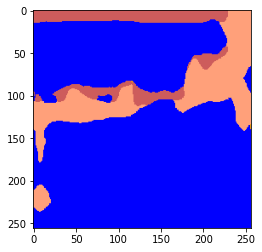

In [0]:

from matplotlib import image
from matplotlib import pyplot

pyplot.imshow(color_image)
pyplot.show()

uint8
(1080, 1920, 3)


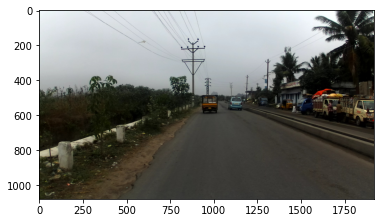

In [0]:
# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot
# load image as pixel array
data = image.imread(x_path[1])
# summarize shape of the pixel array
print(data.dtype)
print(data.shape)
# display the array of pixels as an image
pyplot.imshow(data)
pyplot.show()

In [0]:
image_te = []
image = cv2.imread(x_path[300])
img = cv2.resize(image, (256, 256))
img = np.float32(img)  / 255 
image_te.append(img)
image_te = np.array(image_te)
result = model.predict(image_te)
result = np.argmax(result, axis=3)
colors = np.array([
    [255, 192 ,203	],      
    [255, 160, 122],     
    [255, 105, 180],      
    [205,  92,  92],        
    [255, 165,   0],    
    [255, 255,   0],      
    [165,  42,  42],     
    [0,   0, 255]           
], dtype=np.int)
image_y_te = []

color_image = np.zeros(
        (result.shape[1], result.shape[2], 3), dtype=np.int)
for i in range(8):
  color_image[result[0] == i] = colors[i]
image_y_te.append(color_image)
image_y_te = np.array(image_y_te)

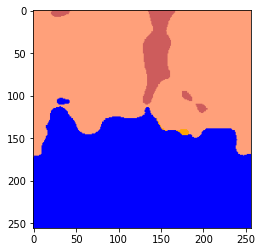

In [0]:

from matplotlib import image
from matplotlib import pyplot

pyplot.imshow(color_image)
pyplot.show()

uint8
(1080, 1920, 3)


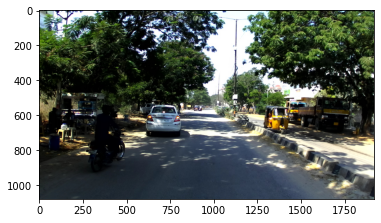

In [0]:
# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot
# load image as pixel array
data = image.imread(x_path[300])
# summarize shape of the pixel array
print(data.dtype)
print(data.shape)
# display the array of pixels as an image
pyplot.imshow(data)
pyplot.show()